In [30]:
from qiskit import *
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_textbook.tools import vector2latex
from qiskit.quantum_info import Statevector
from qiskit.providers.aer import QasmSimulator

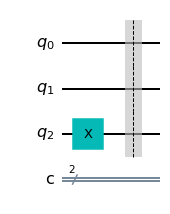

In [20]:
dj_0 = QuantumCircuit(3,2)
dj_0.x(2)
dj_0.barrier()
dj_0.draw(output="mpl")

In [21]:
sv = Statevector.from_label('000')
sv_0 = sv.evolve(dj_0)
sv_0.draw(output='latex')

<IPython.core.display.Latex object>

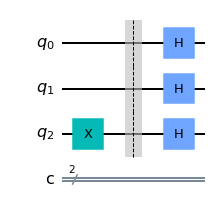

In [22]:
dj_1 = dj_0.copy('')
for i in range(3):
    dj_1.h(i)
dj_1.draw(output="mpl")

In [23]:
sv_1 = sv.evolve(dj_1)
sv_1.draw(output="latex")

<IPython.core.display.Latex object>

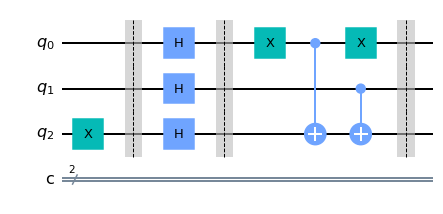

In [24]:
dj_2 = dj_1.copy('')
dj_2.barrier()

b_str = "10"
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        dj_2.x(qubit)
for qubit in range(2):
    dj_2.cx(qubit, 2)

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        dj_2.x(qubit)
dj_2.barrier()
dj_2.draw(output="mpl")

In [25]:
sv_2 = sv.evolve(dj_2)
sv_2.draw(output="latex")

<IPython.core.display.Latex object>

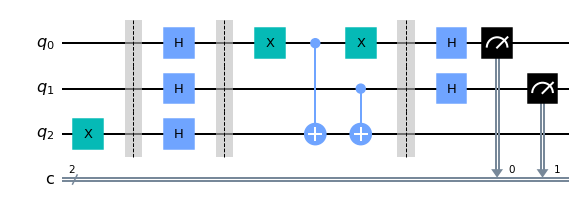

In [28]:
dj_3 = dj_2.copy('')
for i in range(2):
    dj_3.h(i)
for i in range(2):
    dj_3.measure(i, i)
dj_3.draw(output="mpl")

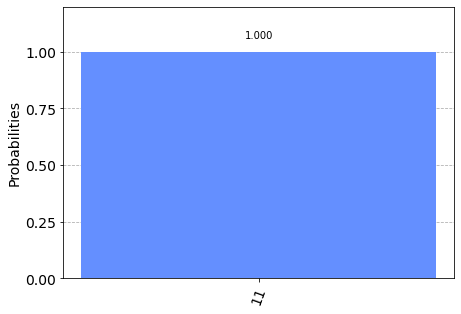

In [32]:
backend = QasmSimulator()
qc_compiled = transpile(dj_3, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts)